In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
%matplotlib inline

First let us load the dataset into the program using pandas

In [37]:
dataframe = pd.read_csv("Education_Loan.csv")

Now let us take a look at our dataset

In [ ]:
dataframe.head(5)

,Name,Nationality,Age,Program_Type,Total_income_P_G_S,Any_Securities,Credit Score,Secured Admit Card,Eligibility
0,Karan Shah,Indian,23.0,UG,Stable,Yes,660.0,Yes,Yes
1,Moksha Shinde,Indian,22.0,UG,Stable,No,558.0,Yes,No
2,Nikita Joshi,Indian,19.0,UG,Stable,No,525.0,Yes,No
3,Rahil Porwal,Indian,34.0,PG,Not Stable,No,529.0,Yes,No
4,Meet Shah,Indian,20.0,UG,Stable,No,764.0,Yes,Yes


As we can see that we have 6 independent and 1 dependent column in the dataset. Let us first check if there are any null values present in our dataset or not.

In [ ]:
dataframe.isnull().sum()

Name                  2
Nationality           2
Age                   2
Program_Type          2
Total_income_P_G_S    2
Any_Securities        2
Credit Score          2
Secured Admit Card    2
Eligibility           0
dtype: int64

Since there are a constant number of null values in each attribute we can assume that there might be full empty two rows in dataset so let us just drop the null values.

In [ ]:
dataframe = dataframe.dropna()

In [ ]:
dataframe.isnull().sum()

Name                  0
Nationality           0
Age                   0
Program_Type          0
Total_income_P_G_S    0
Any_Securities        0
Credit Score          0
Secured Admit Card    0
Eligibility           0
dtype: int64

Now let us now describe our data and look into stats

In [ ]:
dataframe.describe()

,Age,Credit Score
count,149.000000,149.000000
mean,24.073826,641.630872
std,4.505393,87.699760
min,15.000000,500.000000
25%,22.000000,564.000000
50%,23.000000,636.000000
75%,25.000000,717.000000
max,38.000000,800.000000


Now let us see if data in each attribute is normally distributed or not


First let us check with the age attribute using a boxplot

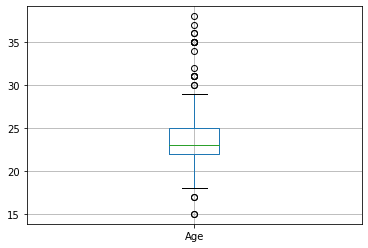

In [ ]:
dataframe.boxplot(column="Age")

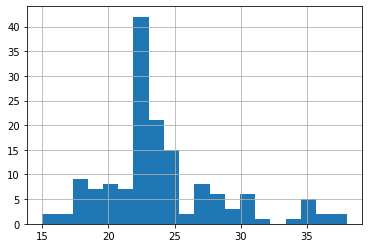

In [ ]:
dataframe['Age'].hist(bins=20)

As we can see that the above graph is little left skewed let us not normalize the age data and create a new column of it named age_log.

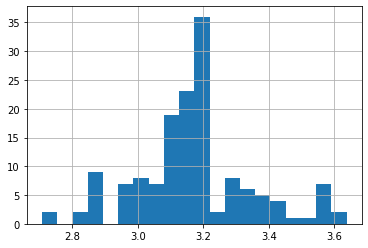

In [ ]:
dataframe['Age_log'] = np.log(dataframe['Age'])
dataframe['Age_log'].hist(bins=20)

Similarly let us check for credit score as well

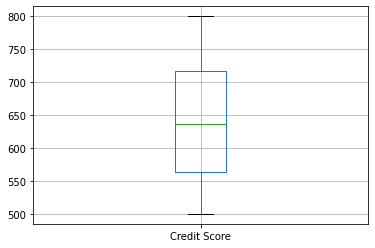

In [ ]:
dataframe.boxplot(column='Credit Score')

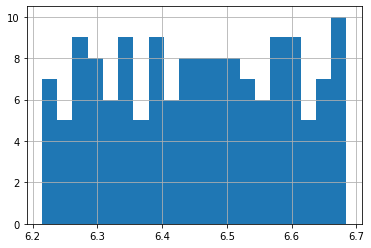

In [ ]:
dataframe['Credit_score_log'] = np.log(dataframe['Credit Score'])
dataframe['Credit_score_log'].hist(bins=20)

since there are no much outliers present in the credit score solumn we do not need to normalize it.

In [ ]:
dataframe.columns

Index(['Name', 'Nationality', 'Age', 'Program_Type', 'Total_income_P_G_S',
       'Any_Securities', 'Credit Score', 'Secured Admit Card', 'Eligibility',
       'Age_log', 'Credit_score_log'],
      dtype='object')

Since we have removed all the null values and also we have nromalized the reuired data in the dataset let us not divide our dataset into dependent and independent data respectively.

**X will contain all the data that is independent that is in our case :
Nationality, Age_log, Total_income_P_G_S, Any_Securities, Credit_Score, Secured_Admit_Card.**

**Y will contain all the data that is to be predicted that is in our case the only dependent data is Elgibility**


In [ ]:
X = dataframe.iloc[:, np.r_[1,4:8,9,10]].values
Y = dataframe.iloc[:, 8].values

Let us look at our X and Y

In [ ]:
X

array([['Indian', 'Stable', 'Yes', ..., 'Yes', 3.1354942159291497,
        6.492239835020471],
       ['Indian', 'Stable', 'No', ..., 'Yes', 3.091042453358316,
        6.324358962381311],
       ['Indian', 'Stable', 'No', ..., 'Yes', 2.9444389791664403,
        6.263398262591624],
       ...,
       ['Indian', 'Stable', 'Yes', ..., 'Yes', 3.4657359027997265,
        6.511745329644728],
       ['Not Indian', 'Not Stable', 'Yes', ..., 'Yes',
        3.6109179126442243, 6.513230110912307],
       ['Indian', 'Stable', 'No', ..., 'Yes', 3.1354942159291497,
        6.466144724237619]], dtype=object)

In [ ]:
Y

array(['Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',

Since we have divides our data into independent and dependent dataset respectively let us now split our data into training and testing data using sklearn.modelselection 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Let us now explore our X_train and X_test data

In [ ]:
X_train

array([['Indian', 'Stable', 'No', 719.0, 'Yes', 3.1354942159291497,
        6.577861357721047],
       ['Indian', 'Not Stable', 'No', 546.0, 'Yes', 3.091042453358316,
        6.302618975744905],
       ['Indian', 'Not Stable', 'Yes', 572.0, 'No', 3.5553480614894135,
        6.349138991379798],
       ['Indian', 'Stable', 'No', 549.0, 'No', 2.995732273553991,
        6.3080984415095305],
       ['Indian', 'Not Stable', 'Yes', 716.0, 'Yes', 3.1354942159291497,
        6.573680166960646],
       ['Indian', 'Not Stable', 'Yes', 616.0, 'Yes', 3.091042453358316,
        6.423246963533519],
       ['Indian', 'Not Stable', 'No', 794.0, 'Yes', 2.9444389791664403,
        6.677083461247136],
       ['Indian', 'Stable', 'Yes', 786.0, 'Yes', 3.332204510175204,
        6.666956792429207],
       ['Indian', 'Stable', 'Yes', 512.0, 'Yes', 3.5553480614894135,
        6.238324625039508],
       ['Indian', 'Stable', 'No', 525.0, 'Yes', 2.9444389791664403,
        6.263398262591624],
       ['Indian', 'S

Since we have many attributes who's data is in categorical form and the machine does not understand data in any other form than numerical form. So let us encode the categorical data into numerical data using sklearns label encoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x = LabelEncoder()

In [ ]:
for i in range(0,3):
  X_train[:,i] = label_encoder_x.fit_transform(X_train[:,i])
X_train[:,4] = label_encoder_x.fit_transform(X_train[:,4])

In [ ]:
X_train

array([[0, 1, 0, 719.0, 1, 3.1354942159291497, 6.577861357721047],
       [0, 0, 0, 546.0, 1, 3.091042453358316, 6.302618975744905],
       [0, 0, 1, 572.0, 0, 3.5553480614894135, 6.349138991379798],
       [0, 1, 0, 549.0, 0, 2.995732273553991, 6.3080984415095305],
       [0, 0, 1, 716.0, 1, 3.1354942159291497, 6.573680166960646],
       [0, 0, 1, 616.0, 1, 3.091042453358316, 6.423246963533519],
       [0, 0, 0, 794.0, 1, 2.9444389791664403, 6.677083461247136],
       [0, 1, 1, 786.0, 1, 3.332204510175204, 6.666956792429207],
       [0, 1, 1, 512.0, 1, 3.5553480614894135, 6.238324625039508],
       [0, 1, 0, 525.0, 1, 2.9444389791664403, 6.263398262591624],
       [0, 1, 1, 673.0, 1, 3.4657359027997265, 6.511745329644728],
       [0, 1, 0, 630.0, 0, 3.2188758248682006, 6.4457198193855785],
       [0, 1, 1, 779.0, 1, 3.332204510175204, 6.658011045870748],
       [0, 1, 0, 536.0, 0, 3.1354942159291497, 6.284134161070802],
       [0, 1, 1, 759.0, 1, 3.4011973816621555, 6.63200177739563],

Similarly lets perform encoding for X_test

In [ ]:
for i in range(0,3):
  X_test[:,i] = label_encoder_x.fit_transform(X_test[:,i])
X_test[:,4] = label_encoder_x.fit_transform(X_test[:,4])

In [ ]:
X_test

array([[0, 1, 0, 590.0, 1, 3.1354942159291497, 6.380122536899765],
       [0, 0, 1, 522.0, 1, 3.295836866004329, 6.257667587882639],
       [1, 1, 1, 624.0, 0, 2.995732273553991, 6.436150368369428],
       [0, 1, 0, 538.0, 1, 3.295836866004329, 6.2878585601617845],
       [0, 1, 0, 653.0, 0, 3.1780538303479458, 6.481577129276431],
       [0, 0, 1, 797.0, 1, 3.1354942159291497, 6.680854678790215],
       [0, 1, 0, 601.0, 1, 3.1780538303479458, 6.398594934535208],
       [0, 0, 1, 739.0, 1, 2.9444389791664403, 6.6052979209482015],
       [0, 0, 0, 657.0, 1, 3.2188758248682006, 6.48768401848461],
       [0, 0, 1, 604.0, 1, 3.2188758248682006, 6.403574197934815],
       [0, 1, 0, 529.0, 1, 3.1780538303479458, 6.270988431858299],
       [0, 0, 1, 667.0, 1, 3.2188758248682006, 6.502790045915623],
       [0, 1, 0, 627.0, 1, 3.1354942159291497, 6.440946540632921],
       [0, 1, 1, 530.0, 1, 3.6375861597263857, 6.272877006546167],
       [0, 1, 0, 712.0, 1, 3.295836866004329, 6.568077911411976]

In [ ]:
label_encoder_y = LabelEncoder()

In [ ]:
Y_train[:5]

array(['Yes', 'No', 'No', 'No', 'Yes'], dtype=object)

In [ ]:
Y_train = label_encoder_y.fit_transform(Y_train)

In [ ]:
Y_train[:5]

array([1, 0, 0, 0, 1])

In [ ]:
Y_test

array(['No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes'],
      dtype=object)

In [ ]:
Y_test = label_encoder_y.fit_transform(Y_test)

In [ ]:
Y_test[:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(criterion='entropy', random_state = 0)
DTclassifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
Y_pred_using_decision_tree = DTclassifier.predict(X_test)
Y_pred_using_decision_tree

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
Y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
from sklearn import metrics
print('The Accuracy of our model using Decision Tree Algorithm is : ', metrics.accuracy_score(Y_pred_using_decision_tree,Y_test))

The Accuracy of our model using Decision Tree Algorithm is :  0.9333333333333333
